In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# This workbook minic the code from tensorflow tutorial: text_classification; It particularly experiment using the tensorflow 

In [3]:
df = pd.read_csv('train.csv', dtype =object,  usecols= ['id', 'text', 'target'])
df['target'] = df['target'].astype(float)
target = df.pop('target')

In [4]:
ds_raw = tf.data.Dataset.from_tensor_slices((df['text'].values, target.values))

In [306]:
# def custom_standardization(input_data):
#   lowercase = tf.strings.lower(input_data)
#   stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
#   return tf.strings.regex_replace(stripped_html,
#                                   '[%s]' % re.escape(string.punctuation),
#                                   '')

In [5]:
ds_raw_batch = ds_raw.batch(1)

In [6]:
ds_raw_batch

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.float64)>

In [7]:
max_features = 10000
sequence_length = 100
vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [8]:
train_text = ds_raw.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [67]:
# ds_raw
# ds_raw_batch

# before anything can fit to it, first 

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.float64)>

In [9]:
# vectorize text is a layer, it wants the data to be in batch

def vectorize_text(text, label):
#     text = tf.expand_dims(text, -1)
#     label = tf.expand_dims(label, -1)
#     return text, label
    return vectorize_layer(text), label

In [10]:
ds = ds_raw_batch.map(vectorize_text)
# ds = ds_raw.map(vectorize_text)
# val_ds = raw_val_ds.map(vectorize_text)
# test_ds = raw_test_ds.map(vectorize_text)

In [11]:
ds.element_spec

(TensorSpec(shape=(None, 100), dtype=tf.int64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [40]:
# for ele in ds.take(1):
#     print(ele)    

In [12]:
# text, label = next(iter(ds_raw))
# text
# text1 = tf.expand_dims(text, -1)
# vectorize_layer(['Our deeds', 
#                  'are the'])
# vectorize_layer.get_vocabulary()[6241]
# c
# first_review, first_label = text_batch[0], label_batch[0]
# print("Review", first_review)
# print("Label", raw_train_ds.class_names[first_label])
# print("Vectorized review", vectorize_text(first_review, first_label))

'deeds'

In [12]:
embedding_dim = 16 
max_features = 10000

In [337]:
len(ds)
# ds.shape
# tf.shape(ds)

7613

In [13]:
# ds.astfds.as_numpy_numpy()
pct = 0.2
ds.shuffle(buffer_size=7613)
train_ds = ds.take(int(7614 * (1-pct)))
test_ds = ds.skip(int(7614 * (1-pct)))
# tfds.as_numpy(ds)

In [35]:
pct = 0.2
ds_raw_batch.shuffle(buffer_size=7613)
ds_train_raw = ds_raw_batch.take(int(7614 * (1-pct)))
ds_test_raw = ds_raw_batch.skip(int(7614 * (1-pct)))

In [36]:
ds_train_raw

<TakeDataset shapes: ((None,), (None,)), types: (tf.string, tf.float64)>

In [14]:
len(train_ds)
len(test_ds)
embedding_dim = 16

In [15]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [17]:
max_features

10000

In [16]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))
epochs = 10
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs)

Epoch 1/10
6091/6091 [==============================] - 7s 1ms/step - loss: 0.6607 - binary_accuracy: 0.5936 - val_loss: 0.6684 - val_binary_accuracy: 0.5342
Epoch 2/10
6091/6091 [==============================] - 6s 999us/step - loss: 0.6064 - binary_accuracy: 0.6765 - val_loss: 0.5890 - val_binary_accuracy: 0.7470
Epoch 3/10
6091/6091 [==============================] - 6s 967us/step - loss: 0.5135 - binary_accuracy: 0.7754 - val_loss: 0.5347 - val_binary_accuracy: 0.7654
Epoch 4/10
6091/6091 [==============================] - 6s 975us/step - loss: 0.4498 - binary_accuracy: 0.8052 - val_loss: 0.5033 - val_binary_accuracy: 0.7766
Epoch 5/10
6091/6091 [==============================] - 6s 975us/step - loss: 0.4063 - binary_accuracy: 0.8288 - val_loss: 0.4836 - val_binary_accuracy: 0.7812
Epoch 6/10
6091/6091 [==============================] - 6s 1ms/step - loss: 0.3732 - binary_accuracy: 0.8448 - val_loss: 0.4687 - val_binary_accuracy: 0.7911
Epoch 7/10
6091/6091 [======================

In [18]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1522/1522 [==============================] - 1s 359us/step - loss: 0.4567 - binary_accuracy: 0.7930
Loss:  0.45666685700416565
Accuracy:  0.7930355072021484


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

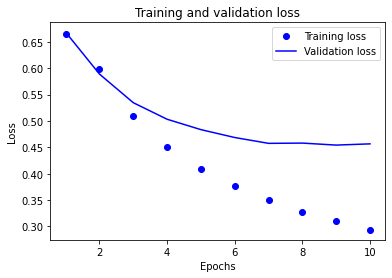

In [21]:
import matplotlib.pyplot as plt
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

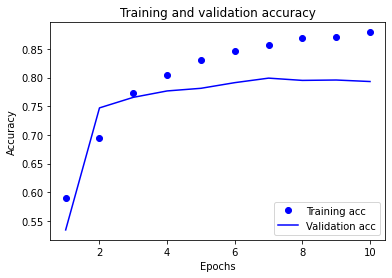

In [22]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [37]:
# combine the trained model with other layers
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(ds_test_raw)
print(accuracy)

1522/1522 [==============================] - 1s 345us/step - loss: 0.4738 - accuracy: 0.7885
0.7930355072021484


In [48]:
examples = [
  "an accident on 101",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.6112107 ],
       [0.40709385],
       [0.4134224 ]], dtype=float32)

In [30]:
model.predict(test_ds)

array([[-0.64754075],
       [ 0.3400206 ],
       [-2.8966432 ],
       ...,
       [ 0.7459343 ],
       [ 4.7466764 ],
       [ 9.163981  ]], dtype=float32)

In [75]:
ds, df = ds_test_raw.take(10)

# work with numpy and pandas, it is hard to make the conversions back and for

ValueError: too many values to unpack (expected 2)

In [74]:
# for ele, text in ds_test_raw.take(-1):
#     print(ele)

# t = ds_test_raw.map(lambda x, y: x.numpy())

# how does tensorflow's shape work

In [71]:
tensor1 = tf.constant([[2,3,4]])

# tensor1 = tf.constant([2,3,4])

# tensor1 = tf.constant([[2],[5],[8],[11]])

In [72]:
tensor1.numpy()

array([[2, 3, 4]], dtype=int32)

In [164]:
# tensor1.shape

TensorShape([4, 1])

In [76]:
tensor1 = tf.constant([[2, 3],
                       [4, 5], 
                       [6, 7], 
                       [8, 9]])

# tensor1_a = tf.expand_dims(tensor1, 0)

# tensor1_a = tf.expand_dims(tensor1, -1)
tensor1_a = tensor1


# tensor1 = tf.constant([[2.0], [3.0], [4.0]])

In [77]:
print(tensor1.shape)
print(tensor1_a.shape)

(4, 2)
(4, 2)


In [73]:
# This one works
# tensor2 = tf.constant([7, 13, 19, 25])
# this one also works
tensor2 = tf.constant([[7], [13], [19], [25]])

# tensor2_a = tf.expand_dims(tensor2, 1)
# tensor2_a = tf.expand_dims(tensor2, -1)
tensor2_a = tensor2

In [74]:
print(tensor2.shape)

print(tensor2_a.shape)

(4, 1)
(4, 1)


In [78]:
ds = tf.data.Dataset.from_tensor_slices((tensor1_a, tensor2_a))

In [79]:
ds.element_spec

# this represents the dimmension of the each training element; 
# training: is a vector of lenth 2 
# target: is a scaler, (or a vector of lenth 1, same result)
# (2,) a vector of two value

(TensorSpec(shape=(2,), dtype=tf.int32, name=None),
 TensorSpec(shape=(1,), dtype=tf.int32, name=None))

In [80]:
train_ds = ds.batch(1)

In [60]:
train_ds

<TakeDataset shapes: ((None, 100), (None,)), types: (tf.int64, tf.float64)>

In [61]:
value, label = next(iter(ds))

In [177]:
print(value)
print(label)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
tf.Tensor([4], shape=(1,), dtype=int32)


In [82]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

history = linear_model.fit(
    tensor1, tensor2, 
    epochs=100,
    verbose=0)

print(linear_model.layers[0].kernel)

linear_model.predict(tensor1)

<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[1.9262124 ],
       [0.83424425]], dtype=float32)>


array([[ 7.870488],
       [13.391401],
       [18.912315],
       [24.43323 ]], dtype=float32)

In [300]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

history = linear_model.fit(
    train_ds, 
    epochs=100,
    # suppress logging
    verbose=0)

print(linear_model.layers[0].kernel)

# linear_model.predict(tensor1)

<tf.Variable 'dense_52/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[2.145731],
       [0.833519]], dtype=float32)>


In [266]:
linear_model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (2, 1)                    2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
